In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Collection

In [2]:
df=pd.read_csv("insurance_claims.csv")

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


Exploratory Data Analysis

In [4]:
df.shape

(1000, 39)

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [6]:
keep_cols = [
    'months_as_customer', 'age', 'policy_state', 'policy_csl',
    'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
    'insured_sex', 'insured_education_level', 'insured_occupation',
    'insured_relationship', 'incident_type', 'collision_type',
    'incident_severity', 'authorities_contacted',
    'incident_hour_of_the_day', 'number_of_vehicles_involved',
    'property_damage', 'bodily_injuries', 'witnesses',
    'police_report_available', 'total_claim_amount',
    'injury_claim', 'property_claim', 'vehicle_claim',
    'fraud_reported'
]

df = df[keep_cols]


In [7]:
df.shape

(1000, 26)

In [8]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,1,?,0,0,?,5070,780,780,3510,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,1,?,1,2,NO,63400,6340,6340,50720,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,1,NO,0,1,NO,6500,1300,650,4550,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,...,1,YES,0,1,?,87200,17440,8720,61040,N
996,285,41,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,...,1,YES,2,3,?,108480,18080,18080,72320,N
997,130,34,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,...,3,?,2,3,YES,67500,7500,7500,52500,N
998,458,62,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,...,1,?,0,1,YES,46980,5220,5220,36540,N


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_relationship         1000 non-null   object 
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

Missing Value Analysis

In [10]:
df['property_damage'].value_counts()

property_damage
?      360
NO     338
YES    302
Name: count, dtype: int64

In [12]:
cols_with_missing = ['police_report_available','property_damage','collision_type']
for col in cols_with_missing:
    df[col] = df[col].replace('?', np.nan)

In [13]:
df.isna().sum()

months_as_customer               0
age                              0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

In [14]:
missing_cols = ['collision_type','authorities_contacted','property_damage','police_report_available']
for col in missing_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\sreel\AppData\Local\Temp\ipykernel_27264\403249929.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Checking Duplicated Values

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df['fraud_reported'].value_counts()

fraud_reported
N    753
Y    247
Name: count, dtype: int64

Univariate Analysis

In [17]:
# Numerical Features
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000


In [18]:
pd.crosstab(df['incident_severity'], df['fraud_reported'])

fraud_reported,N,Y
incident_severity,,
Major Damage,109,167
Minor Damage,316,38
Total Loss,244,36
Trivial Damage,84,6


In [19]:
df.groupby('fraud_reported')['total_claim_amount'].mean()

fraud_reported
N    50288.605578
Y    60302.105263
Name: total_claim_amount, dtype: float64

In [20]:
df['policy_deductable'].value_counts()

policy_deductable
1000    351
500     342
2000    307
Name: count, dtype: int64

In [21]:
# Categorical Freatures
for col in df:
    if df[col].dtype=='object':
        print(df[col].value_counts())
        print("_"*40)

policy_state
OH    352
IL    338
IN    310
Name: count, dtype: int64
________________________________________
policy_csl
250/500     351
100/300     349
500/1000    300
Name: count, dtype: int64
________________________________________
insured_sex
FEMALE    537
MALE      463
Name: count, dtype: int64
________________________________________
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: count, dtype: int64
________________________________________
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: count, dtype: int64
________________________________________
insured_rel

Correlation Analysis

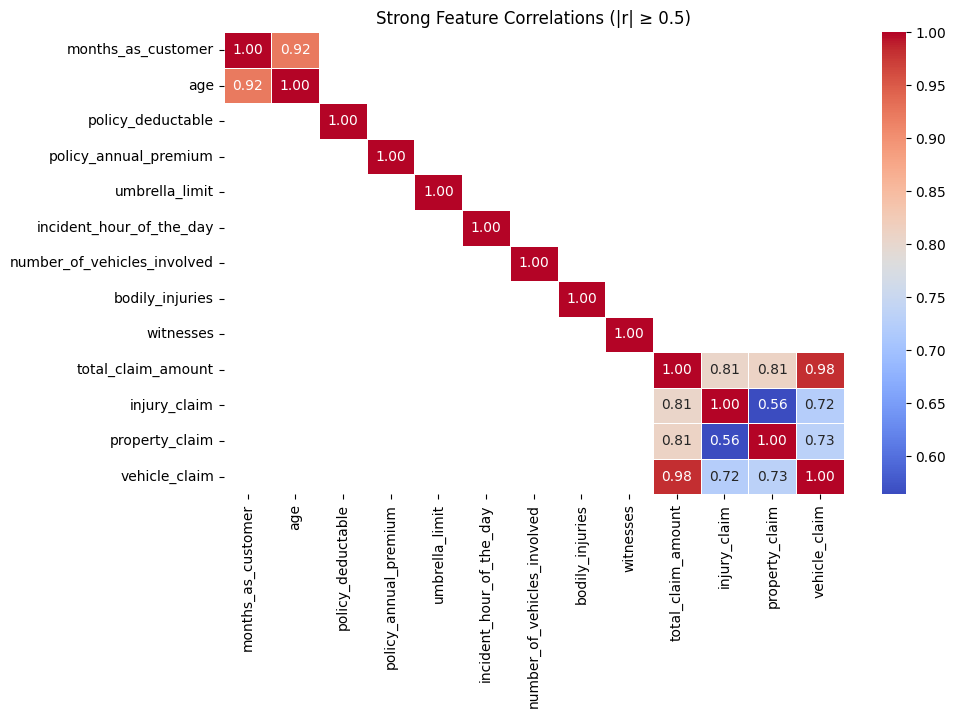

In [22]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()

# Keep only strong correlations
mask = np.abs(corr) < 0.5

plt.figure(figsize=(10, 6))
sns.heatmap(corr,mask=mask,cmap='coolwarm',annot=True,fmt=".2f",linewidths=0.5)
plt.title("Strong Feature Correlations (|r| ≥ 0.5)")
plt.show()

Correlation analysis revealed strong multicollinearity between age and months_as_customer, as well as among claim-related variables. The total_claim_amount exhibited near-perfect correlation with vehicle_claim and strong correlations with injury and property claims, indicating that it represents an aggregate severity measure. While this poses multicollinearity concerns for linear models, tree-based models can effectively leverage these relationships. In the context of fraud detection, correlated increases across multiple claim components may serve as meaningful indicators of fraudulent behavior.

### Target vs Feature Analysis

In [23]:
# Target Distribution
df['fraud_reported'].value_counts(normalize=True)

fraud_reported
N    0.753
Y    0.247
Name: proportion, dtype: float64

Class imbalance present

In [24]:
# Categories with higher fraud proportion
pd.crosstab(df['incident_severity'], df['fraud_reported'], normalize='index')
# Major damage incidents show higher fraud rates.

fraud_reported,N,Y
incident_severity,,
Major Damage,0.394928,0.605072
Minor Damage,0.892655,0.107345
Total Loss,0.871429,0.128571
Trivial Damage,0.933333,0.066667


Outlier Detection

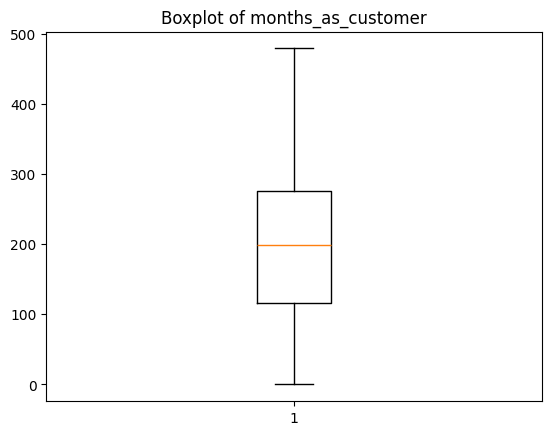

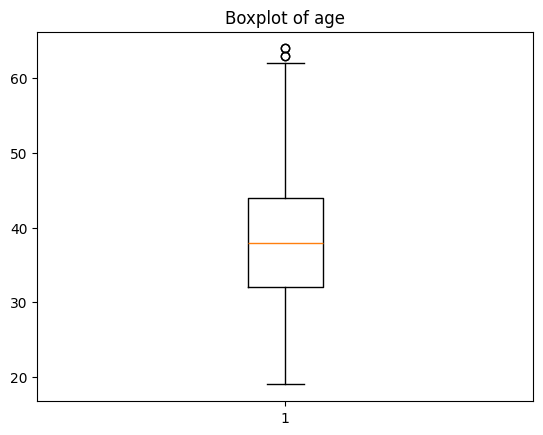

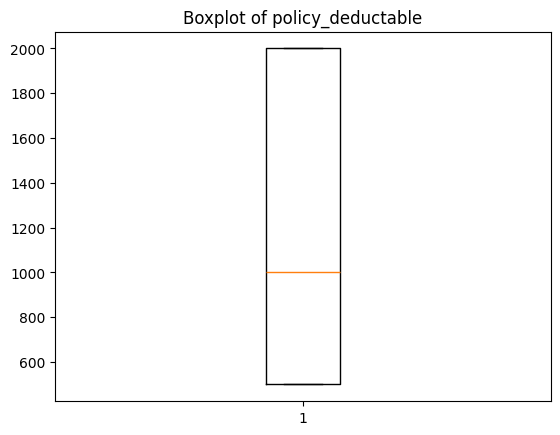

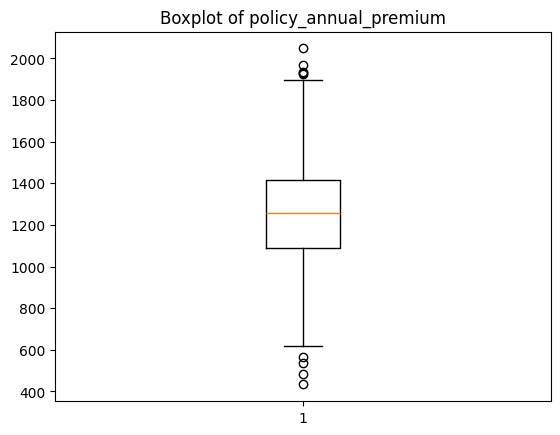

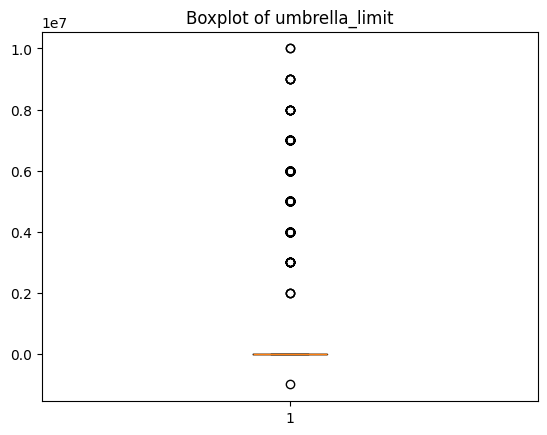

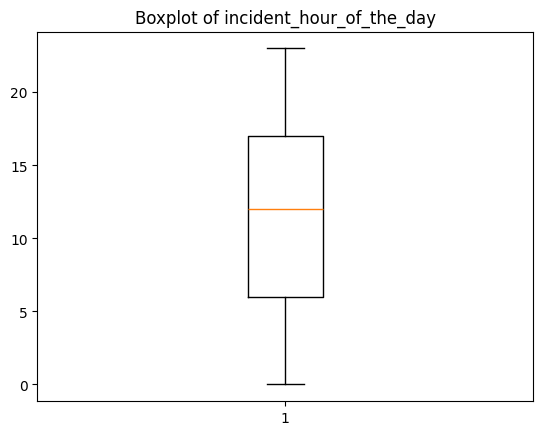

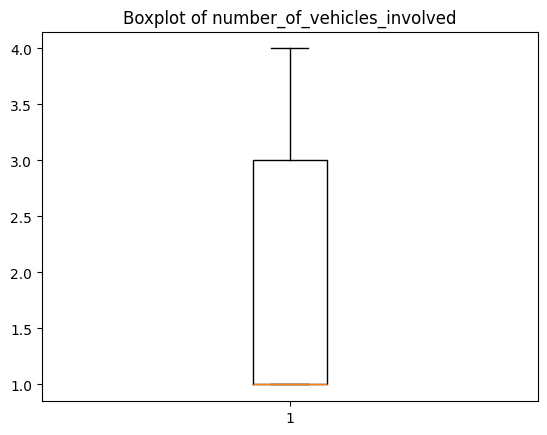

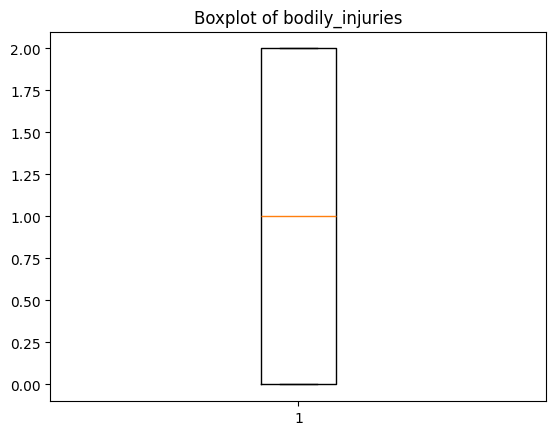

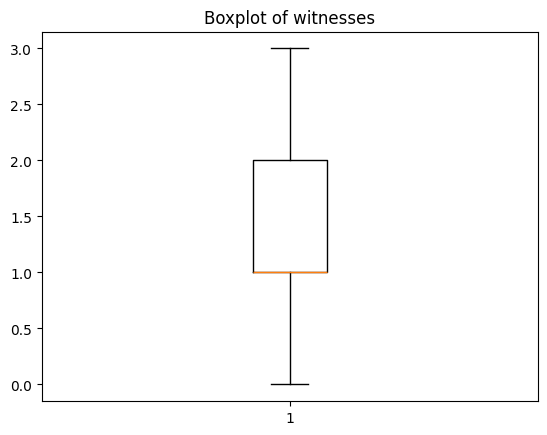

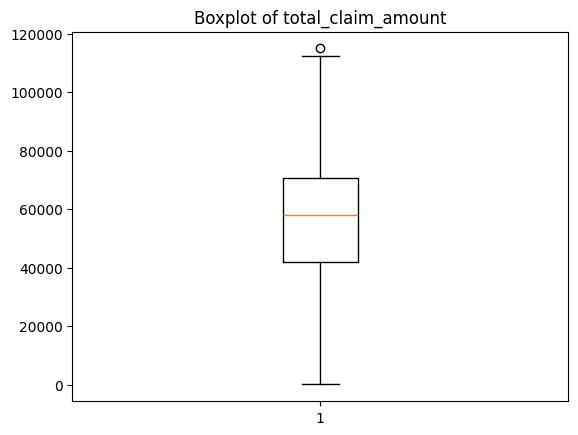

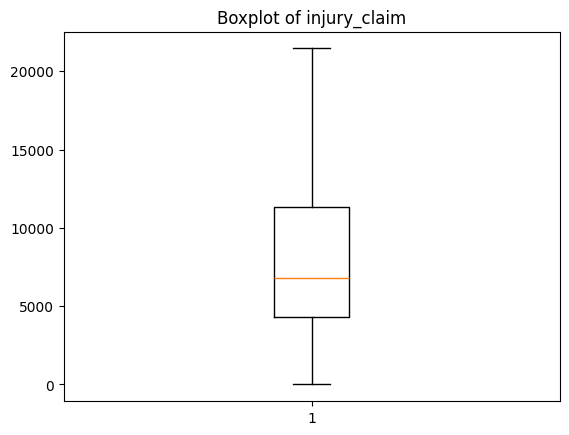

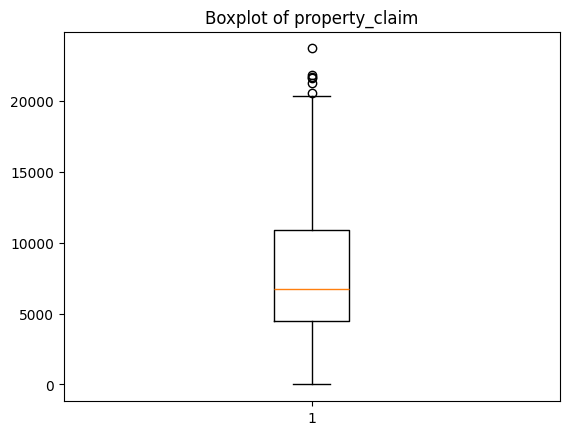

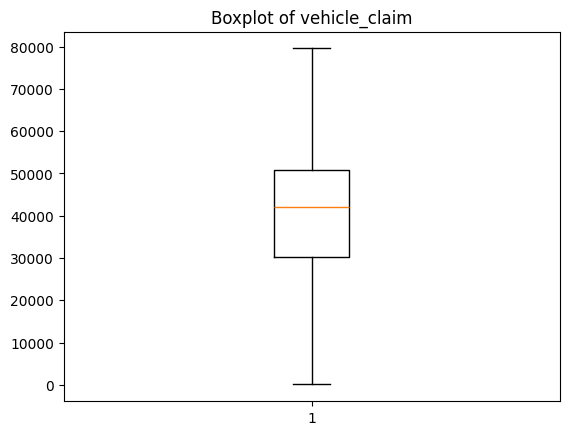

In [25]:
for col in df:
    if df[col].dtype in ['int64','float64']:
        plt.boxplot(df[col])
        plt.title(f"Boxplot of {col}")
        plt.show()

In [26]:
df['umbrella_limit'].value_counts()

umbrella_limit
 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: count, dtype: int64

In [27]:
# Handling outlier in 'umbrella_limit'
df.loc[df['umbrella_limit'] < 0, 'umbrella_limit'] = 0

In [28]:
# Converting 'umbrella_limit' as a binary feature
df['has_umbrella'] = (df['umbrella_limit'] > 0).astype(int)

In [29]:
df.drop(columns=['umbrella_limit'], inplace=True)

In [30]:
df['has_umbrella'].value_counts()

has_umbrella
0    799
1    201
Name: count, dtype: int64

In [31]:
pd.crosstab(df['has_umbrella'],df['fraud_reported'],normalize=True)

fraud_reported,N,Y
has_umbrella,,
0,0.612,0.187
1,0.141,0.060


Feature Relationship Checks

<Axes: xlabel='fraud_reported', ylabel='months_as_customer'>

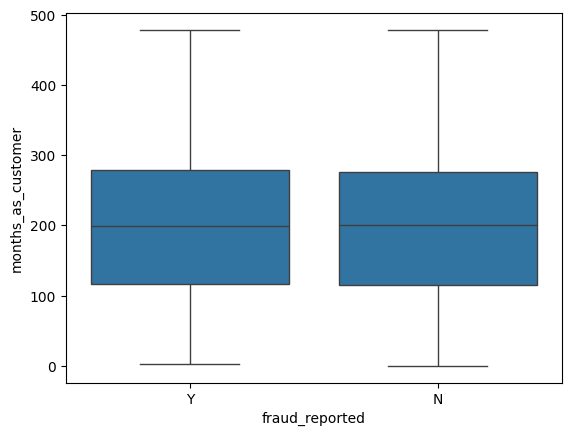

In [32]:
# months_as_customer vs Fraud
sns.boxplot(x='fraud_reported', y='months_as_customer', data=df)

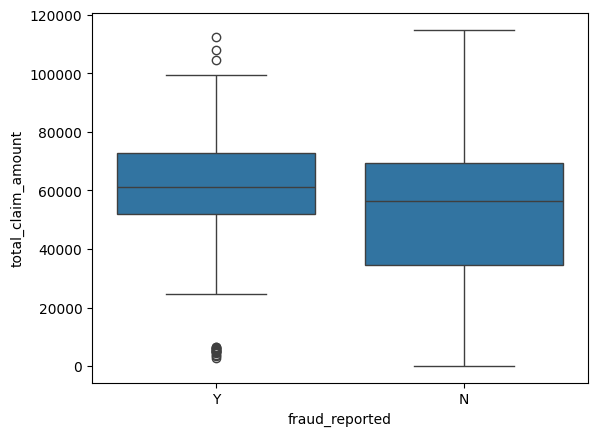

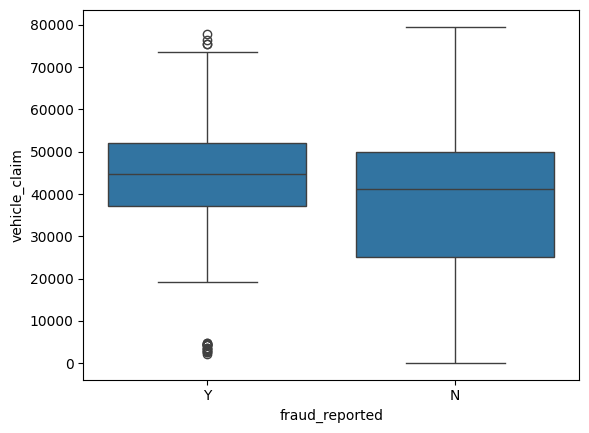

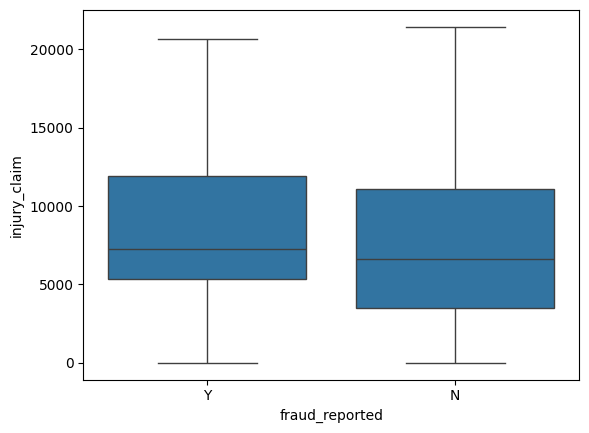

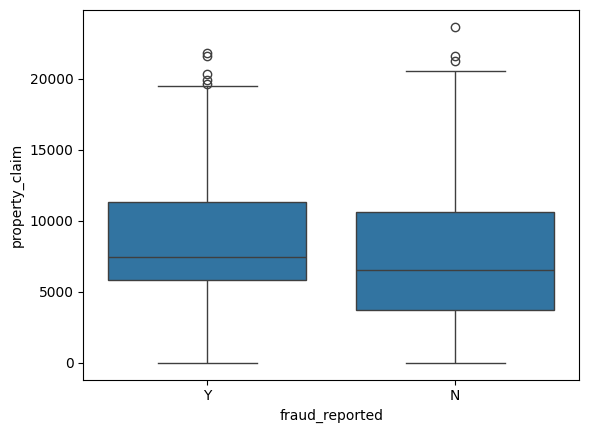

In [33]:
# Claim Amounts vs Fraud

claim_cols = ['total_claim_amount','vehicle_claim','injury_claim','property_claim']
for col in claim_cols:
    sns.boxplot(x='fraud_reported', y=col, data=df)
    plt.show()

<Axes: xlabel='number_of_vehicles_involved', ylabel='count'>

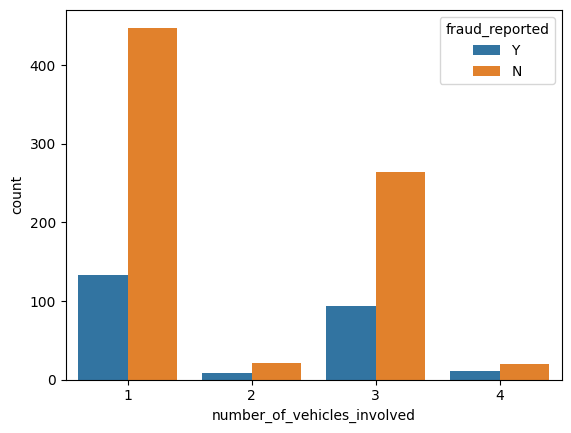

In [34]:
sns.countplot(x='number_of_vehicles_involved', hue='fraud_reported', data=df)

In [35]:
pd.crosstab(df['police_report_available'], df['fraud_reported'], normalize='index')
pd.crosstab(df['property_damage'], df['fraud_reported'], normalize='index')


fraud_reported,N,Y
property_damage,,
NO,0.757880,0.242120
YES,0.741722,0.258278


In [36]:
pd.crosstab(df['incident_type'], df['fraud_reported'], normalize='index')



fraud_reported,N,Y
incident_type,,
Multi-vehicle Collision,0.727924,0.272076
Parked Car,0.904762,0.095238
Single Vehicle Collision,0.709677,0.290323
Vehicle Theft,0.914894,0.085106


Target vs feature analysis revealed clear behavioral differences between fraudulent and non-fraudulent claims. Fraudulent cases were associated with higher claim amounts, inflated injury and vehicle damage reports, fewer witnesses, and absence of police documentation. Incident characteristics such as vehicle theft, major damage, and late-night occurrence showed higher fraud proportions. These patterns indicate deliberate exaggeration and reduced verifiability, making these features strong predictors for fraud detection models.

Final Feature Lists

In [37]:
target = "fraud_reported"

num_features = [
    'months_as_customer',
    'age',
    'policy_deductable',
    'policy_annual_premium',
    'incident_hour_of_the_day',
    'number_of_vehicles_involved',
    'bodily_injuries',
    'witnesses',
    'total_claim_amount',
    'injury_claim',
    'property_claim',
    'vehicle_claim',
    'has_umbrella'
]

cat_features = [
    'policy_state',
    'policy_csl',
    'insured_sex',
    'insured_education_level',
    'insured_occupation',
    'insured_relationship',
    'incident_type',
    'collision_type',
    'incident_severity',
    'authorities_contacted',
    'property_damage',
    'police_report_available'
]


Feature & Target Split

In [38]:

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


In [39]:
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported'].map({'Y': 1, 'N': 0})

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [41]:
X_test.head(2).T

,908,973
months_as_customer,285,230
age,44,37
policy_state,OH,IL
policy_csl,250/500,500/1000
policy_deductable,2000,1000
policy_annual_premium,1144.3,1060.74
insured_sex,MALE,MALE
insured_education_level,MD,PhD
insured_occupation,priv-house-serv,tech-support
insured_relationship,not-in-family,own-child


Preprocessor

In [42]:
# ================================
# 2. Preprocessing Pipelines
# ================================
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)


In [43]:
# ================================
# 3. Models
# ================================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = {
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    ),

    "Random Forest": RandomForestClassifier(
        n_estimators=300,
        max_depth=10,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ),

    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    )
}


In [44]:
# ================================
# 4. Evaluation Function
# ================================
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def evaluate_model(name, pipeline, X_test, y_test, threshold=0.4):
    y_probs = pipeline.predict_proba(X_test)[:, 1]
    y_pred = (y_probs >= threshold).astype(int)

    print(f"\n{name}")
    print("-" * len(name))
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_probs))


In [45]:
# ================================
# 5. Train Models with SMOTE
# ================================
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

for name, model in models.items():

    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    evaluate_model(name, pipeline, X_test, y_test, threshold=0.4)



Logistic Regression
-------------------
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       151
           1       0.55      0.73      0.63        49

    accuracy                           0.79       200
   macro avg       0.73      0.77      0.74       200
weighted avg       0.82      0.79      0.80       200

Confusion Matrix:
 [[122  29]
 [ 13  36]]
ROC-AUC: 0.8009190431139344

Random Forest
-------------
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       151
           1       0.63      0.73      0.68        49

    accuracy                           0.83       200
   macro avg       0.77      0.80      0.78       200
weighted avg       0.84      0.83      0.83       200

Confusion Matrix:
 [[130  21]
 [ 13  36]]
ROC-AUC: 0.8001081227192864

Gradient Boosting
-----------------
              precision    recall  f1-score   support

           0       0.89      0.88      0.88 

In [46]:
# ================================
# 6. Hyperparameter Tuning (Random Forest)
# ================================
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'classifier__n_estimators': [200, 300, 500],
    'classifier__max_depth': [None, 8, 10, 15],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', rf)
])

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=20,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_

print("Best ROC-AUC:", random_search.best_score_)
print("Best Parameters:")
for k, v in random_search.best_params_.items():
    print(f"{k}: {v}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best ROC-AUC: 0.7471021932612841
Best Parameters:
classifier__n_estimators: 200
classifier__min_samples_split: 5
classifier__min_samples_leaf: 2
classifier__max_features: sqrt
classifier__max_depth: 8


In [47]:
# ================================
# 7. Final Evaluation
# ================================
y_probs = best_model.predict_proba(X_test)[:, 1]
y_pred = (y_probs >= 0.4).astype(int)

print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_probs))


              precision    recall  f1-score   support

           0       0.91      0.86      0.88       151
           1       0.63      0.73      0.68        49

    accuracy                           0.83       200
   macro avg       0.77      0.80      0.78       200
weighted avg       0.84      0.83      0.83       200

Confusion Matrix:
 [[130  21]
 [ 13  36]]
ROC-AUC: 0.7967292877415867


In [48]:
# ================================
# 8. SHAP (NO SMOTE — Correct Way)
# ================================
import shap
import numpy as np

trained_preprocessor = best_model.named_steps['preprocessor']
trained_model = best_model.named_steps['classifier']

X_test_processed = trained_preprocessor.transform(X_test)

num_features_out = num_features
cat_features_out = trained_preprocessor \
    .named_transformers_['cat'] \
    .named_steps['onehot'] \
    .get_feature_names_out(cat_features)

feature_names = np.concatenate([num_features_out, cat_features_out])

explainer = shap.TreeExplainer(trained_model)
shap_values = explainer.shap_values(X_test_processed)


c:\Users\sreel\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [49]:
# ================================
# 9. Save Model & Feature Names
# ================================
import joblib
from pathlib import Path

MODEL_DIR = Path("model")
MODEL_DIR.mkdir(exist_ok=True)

joblib.dump(best_model, MODEL_DIR / "fraud_model.pkl")
joblib.dump(feature_names, MODEL_DIR / "feature_names.pkl")


['model\\feature_names.pkl']